# Example: Monte-Carlo Tree Search (MCTS)
Monte Carlo Tree Search (MCTS) is a robust heuristic search algorithm used in decision-making processes, particularly in game-playing artificial intelligence. It combines the random sampling of Monte Carlo methods with the strategic exploration of game trees, allowing it to efficiently navigate large search spaces and make intelligent decisions even in complex scenarios.

* Before we do anything, let's see how [the MCTS algorithm works](https://www.youtube.com/watch?v=UXW2yZndl7U).

### Test problem
Let's consider a test problem. Suppose you have a [roomba](https://www.irobot.com) that has finished cleaning the floor in your kitchen and needs to return to its charging station. However, between your kitchen and the charging station (home base and safety), there are one or more lava pits (destruction for the [roomba](https://www.irobot.com)). This is an example of a two-dimensional grid-world navigational decision task. 

To solve the Roomba problem using MCTS, we are going to invoke the `buy` side of `buy` versus `build` and use [the POMDPs.jl package](https://github.com/JuliaPOMDP/POMDPs.jl), which provides implementations for several different classes of problems in the [Markov Decision Process (MDPs)](https://en.wikipedia.org/wiki/Markov_decision_process) space.
* The problem setup is encoded in [the `problemsetup_with_reward_shaping.jl`](problemsetup_with_reward_shaping.jl) script. Let's take a look, before executing the code block below.

In [3]:
include("problemsetup_with_reward_shaping.jl"); # sets up a bunch of problem specific stuff

Run the MCTS algorithm in the Roomba search problem:

In [5]:
planner = let

    number_of_iterations = 10; # number of iterations
    depth = 2; # how far down the tree are we going to explore
    exploration_constant = 10.0;

    # solve the planning problem
    solver = MCTSSolver(n_iterations=number_of_iterations, depth=depth, 
        exploration_constant=exploration_constant, enable_tree_vis=true); # create the solver
    planner = solve(solver, mdp);

    # return the policy (called planner in the POMDPs nomenclature)
    planner;
end;

### Visualize

Can we plot the path?

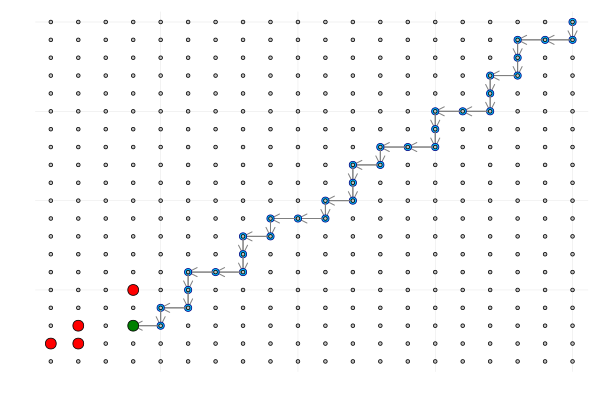

In [17]:
let
    # draw the path -
    p = plot();
    s = GWPos(20,20);
    visited_sites = Set{GWPos}();
    
    while (in(s, absorbing_state_set) == false)

        a = action(planner, s);
        Δ = GWPos(0,0);
        if (a == :up)
            Δ = GWPos(0,1);
        elseif (a == :down)
            Δ = GWPos(0,-1);
        elseif (a == :left)
            Δ = GWPos(-1,0);
        elseif (a == :right)
            Δ = GWPos(1,0);
        end
        s_next =  s .+ Δ
    
        scatter!([s[1]],[s[2]], label="", showaxis=:false, msc=:navy, c=:deepskyblue1)
        plot!([s[1], s_next[1]],[s[2], s_next[2]], label="", arrow=true, lw=1, c=:gray)

        push!(visited_sites, s_next);
        s = s_next;
    end

    # # draw the grid -
    for i ∈ 1:number_of_rows
        for j ∈ 1:number_of_columns
            current_position = (i,j);
            if (haskey(rewards, GWPos(current_position)) == true && rewards[GWPos(current_position)] == charging_reward)
                scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:green, ms=6)
            elseif (haskey(rewards, GWPos(current_position)) == true && rewards[GWPos(current_position)] == lava_reward)
                scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:red, ms=6)
            else
                 scatter!([current_position[1]],[current_position[2]], label="", showaxis=:false, c=:gray76, ms=2)
            end 
        end
    end
    current()
end

What are the decision trees at each node?

In [10]:
let
    state = GWPos(4,10)
    a, info = action_info(planner, state)
    D3Tree(info[:tree], init_expand=2) # click on the node to expand it
end

[4, 10]
N:     10

├──                       up
│  Q:   3.21
│  N:      2

│  └──                  [4, 11]
│     N:      1

│     ├──                       up
│     │  Q:   1.94
│     │  N:      1
 (1 children)
│     ├──                     down
│     │  Q:   0.00
│     │  N:      0
 (0 children)
│     ├──                     left
│     │  Q:   0.00
│     │  N:      0
 (0 children)
│     └──                    right
│        Q:   0.00
│        N:      0
 (0 children)
├──                     down
│  Q:   3.58
│  N:      3

│  └──                   [4, 9]
│     N:      2

│     ├──                       up
│     │  Q:   5.30
│     │  N:      1
 (1 children)
│     ├──                     down
│     │  Q:   5.84
│     │  N:      1
 (1 children)
│     ├──                     left
│     │  Q:   0.00
│     │  N:      0
 (0 children)
│     └──                    right
│        Q:   0.00
│        N:      0
 (0 children)
├──                     left
│  Q:   3.34
│  N:      3

│  └──                  [3, 10]
│     N:      2

│     ├──                       up
│     │  Q:   3.09
│     │  N:      1
 (1 children)
│     ├──                     down
│     │  Q:   3.41
│     │  N:      1
 (1 children)
│     ├──                     left
│     │  Q:   0.00
│     │  N:      0
 (0 children)
│     └──                    right
│        Q:   0.00
│        N:      0
 (0 children)
└──                    right
   Q:   3.33
   N:      2

   └──                  [5, 10]
      N:      1

      ├──                       up
      │  Q:   3.11
      │  N:      1
 (1 children)
      ├──                     down
      │  Q:   0.00
      │  N:      0
 (0 children)
      ├──                     left
      │  Q:   0.00
      │  N:      0
 (0 children)
      └──                    right
         Q:   0.00
         N:      0
 (0 children)